# COVID-19 exclusive diagnositcs from hemogram

## Abstract

The present work proposes a method to predict the result of the SARS-CoV-2 RT-PCR result from a common hemogram test.

The presented model is the capable to issue 'Negative' result for 86% of the suspects from this dataset with less than 1% of False Negative. As the result, 86% of the SARS-CoV-2 RT-PCR test kits can be spared.

**The expected impact of such model is to save costs and lives during the COVID-19 pandemic peak of infections. It can be deployed as a triage process to decide which suspects need to proceed with the SARS-CoV-2 RT-PCR test kits**.


## Background
The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

## Kaggle competition
The present notebook addresses only the TASK 1 (Predict confirmed COVID-19 cases among suspected cases) from [Kaggle competition](https://www.kaggle.com/einsteindata4u/covid19).

## Dataset
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

This dataset was originally uploaded at the [Kaggle website](https://www.kaggle.com/einsteindata4u/covid19#dataset.xlsx).

This source-code is copied on [this repository](https://github.com/diogodutra/COVID-19-Albert_Eintein/blob/master/COVID-19_Albert_Einstein.ipynb).

## Disclaimer
The [author of this notebook](https://diogodutra.github.io/) is a Machine Learning engineer and Lead Data Scientist. Michel Zreik and Bruno Mourao Siqueira are co-authors. The authors have no medical studies. Therefore, the authors can not be liable for the use of the present work. Use at your own discretion.

Feel free to contact at diogodutra@gmail.com to discuss these results or have another customized model for your data.

# Data Cleaning

Some minor data cleaning was performed directly on the xlsx file before running the code below for practical reasons:
- cells values replaced from 'Não Realizado' to 'not_done'
- cells values with ',' replaced by '.' to represent decimals numbers

In [471]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib notebook

from collections import Counter
import random

# Data Load
Let's take a look at the data.

In [109]:
file = '../input/covid19/dataset.xlsx'

data = pd.read_excel(file)

data.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspecting the table above leads to the following observations:
- The label to be predicted is: 'SARS-Cov-2 exam result'
- There are categorical and numerical data
- There are considerable amount of empty values (NaN), probably because not all patients performed every possible clinical exam.

# Data Preparation
Let's prepare the data for further plots.

In [3]:
# define the label to be predicted
label = 'SARS-Cov-2 exam result'

In [4]:
# replace positive/negative by 1/0
data[label] = [1 if result=='positive' else 0 for result in data[label]]

data.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration
How many of the population is positive for the SARS-Cov-2 test?

In [5]:
ref = data[label].mean()

print(f'Percentage of all COVID-19 positives in data: {round(ref*100)}%')

Percentage of all COVID-19 positives in data: 10%


This number is important as a reference. It means that the "Naïve Classifier" blindly guesses that all patients are negative and its False Negative rate is 10%.

Therefore, our new classifier have to provide better performance than this reference in order to be useful.

Which features are in the data?

In [6]:
other_labels = [
    'Patient addmited to regular ward (1=yes, 0=no)'
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)',
]

In [104]:
features_numerical

['Direct Bilirubin',
 'Patient age quantile',
 'Neutrophils',
 'Vitamin B12',
 'Serum Glucose',
 'Creatine phosphokinase\xa0(CPK)\xa0',
 'Mean platelet volume ',
 'Lymphocytes',
 'Ferritin',
 'Metamyelocytes',
 'ctO2 (arterial blood gas analysis)',
 'Urine - Red blood cells',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean corpuscular hemoglobin (MCH)',
 'Ionized calcium\xa0',
 'Indirect Bilirubin',
 'pCO2 (arterial blood gas analysis)',
 'Hematocrit',
 'Segmented',
 'Platelets',
 'pO2 (arterial blood gas analysis)',
 'Lactic Dehydrogenase',
 'HCO3 (arterial blood gas analysis)',
 'HCO3 (venous blood gas analysis)',
 'pH (arterial blood gas analysis)',
 'Arterial Lactic Acid',
 'Gamma-glutamyltransferase\xa0',
 'Magnesium',
 'pH (venous blood gas analysis)',
 'Arteiral Fio2',
 'Total CO2 (venous blood gas analysis)',
 'pCO2 (venous blood gas analysis)',
 'Basophils',
 'Rods #',
 'Urea',
 'Sodium',
 'Myelocytes',
 'Red blood cell distribution width (RDW)',
 'Alanine trans

In [7]:
features = list(set(data.columns) - set(['Patient ID', label] + other_labels))

features_numerical = []
features_categorical = []
features_empties = []

for feature in features:
    hues = set(data[feature][~data[feature].isna()])
    if len(hues)==0:
        features_empties.append(feature)
    else:
        is_string = isinstance(list(hues)[0], str)
        if is_string:
            features_categorical.append(feature)
        else:
            features_numerical.append(feature)
        
        
print(f'{len(features_numerical)} numerical features: ', ', '.join(features_numerical))
print()
print(f'{len(features_categorical)} categorical features: ', ', '.join(features_categorical))
print()
print(f'{len(features_empties)} discarded empty features: ', ', '.join(features_empties))

69 numerical features:  Direct Bilirubin, Patient age quantile, Neutrophils, Vitamin B12, Serum Glucose, Creatine phosphokinase (CPK) , Mean platelet volume , Lymphocytes, Ferritin, Metamyelocytes, ctO2 (arterial blood gas analysis), Urine - Red blood cells, Mean corpuscular hemoglobin concentration (MCHC), Mean corpuscular hemoglobin (MCH), Ionized calcium , Indirect Bilirubin, pCO2 (arterial blood gas analysis), Hematocrit, Segmented, Platelets, pO2 (arterial blood gas analysis), Lactic Dehydrogenase, HCO3 (arterial blood gas analysis), HCO3 (venous blood gas analysis), pH (arterial blood gas analysis), Arterial Lactic Acid, Gamma-glutamyltransferase , Magnesium, pH (venous blood gas analysis), Arteiral Fio2, Total CO2 (venous blood gas analysis), pCO2 (venous blood gas analysis), Basophils, Rods #, Urea, Sodium, Myelocytes, Red blood cell distribution width (RDW), Alanine transaminase, Monocytes, Fio2 (venous blood gas analysis), Leukocytes, Proteina C reativa mg/dL, Patient addmite

There are 100 features available in the data. They are divided in 2 types: numerical and categorical.

6 features are empty so they are dropped from our analyses.

Which features from these 100 are really useful to tell between negative and positive for the SARS-Cov-2 test?

# Data Visualization

The first plot I want to draw the attention is to the age, as shown below.

C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


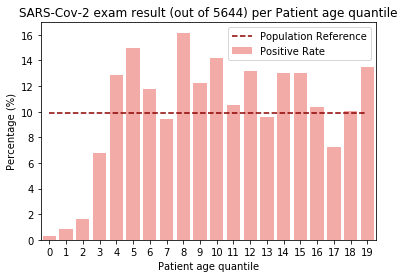

In [8]:
def plot_age(data, label, save=False):
    
    feature = 'Patient age quantile'
    
    plt.figure()
    
    # plot dashed reference line
    dat = data.groupby(feature).count().reset_index()
    x = list(dat[feature])
    y = [ref*100] * len(x)
    ax = sns.lineplot(x, y, c='darkred', label='Population Reference')
    ax.lines[0].set_linestyle("--")

    # Plot the percentages
    sns.set_color_codes('pastel')
    dat = data.groupby(feature).mean().reset_index()
    dat[label] = dat[label] * 100
    sns.barplot(x=feature, y=label, label='Positive Rate', data=dat, color='r')
    
    plt.legend()
    plt.ylabel('Percentage (%)')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')

    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/", "_")}.png')
        
        
plot_age(data, label)

The plot below shows that the babies (age quantile <= 2) are considerably less likely to have positive SARS-Cov-2 result. Therefore, age is useful and it is going to be included in the feature list.

All the rest of the categorical features are plotted below.

C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

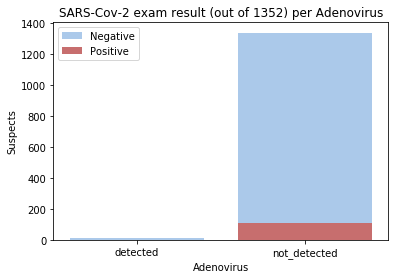

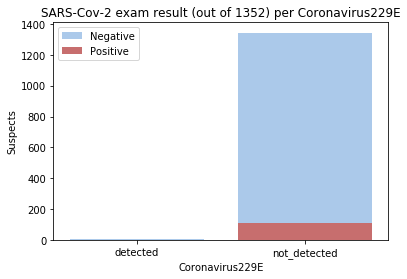

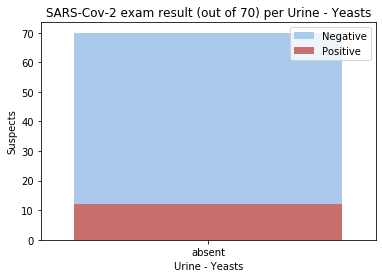

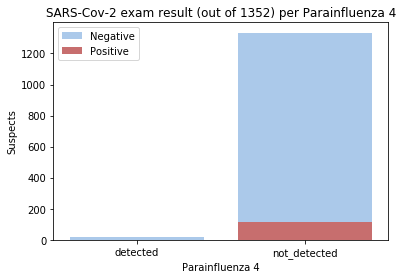

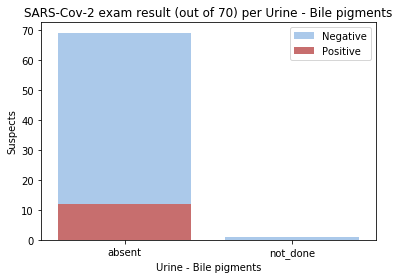

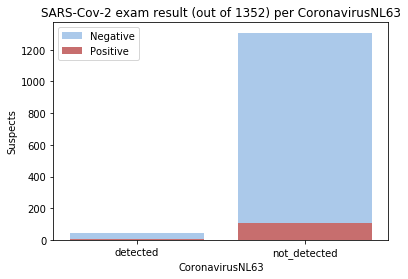

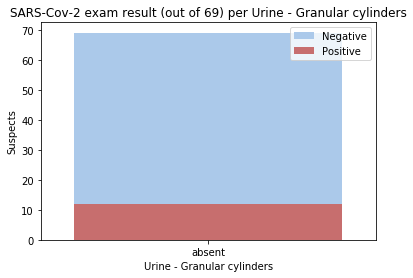

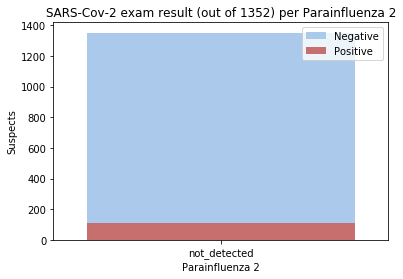

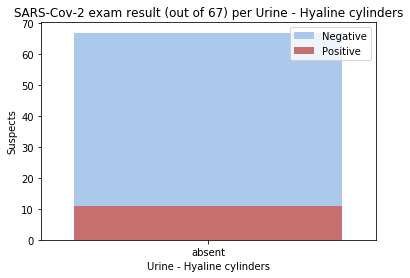

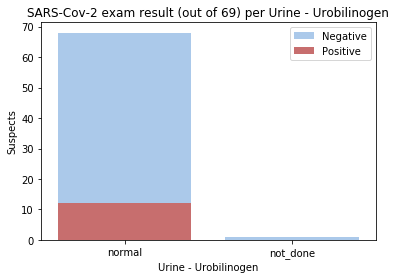

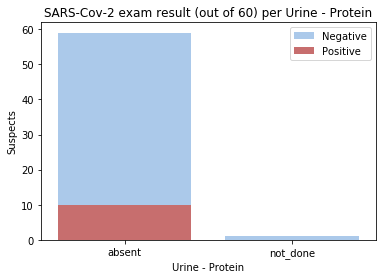

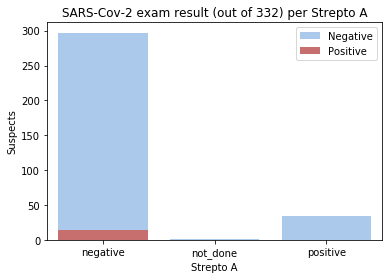

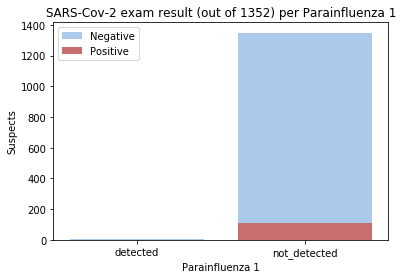

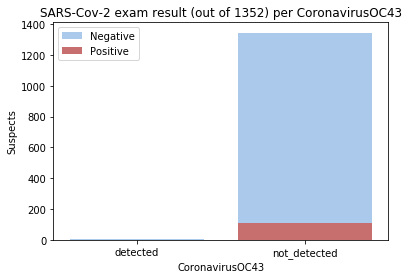

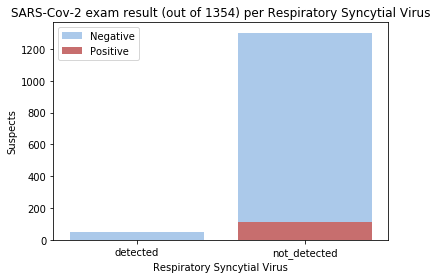

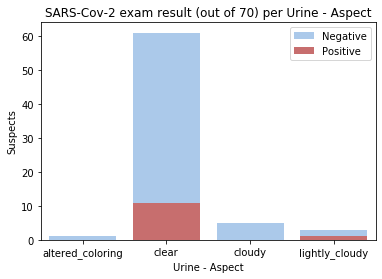

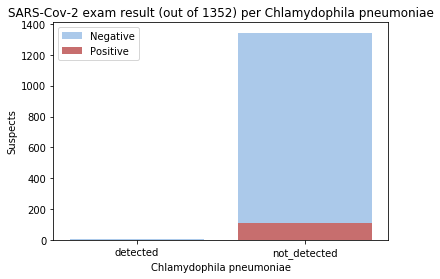

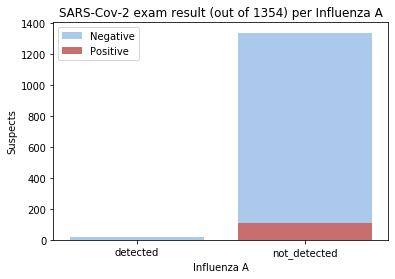

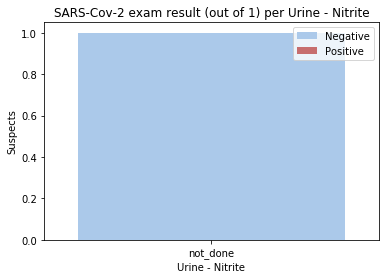

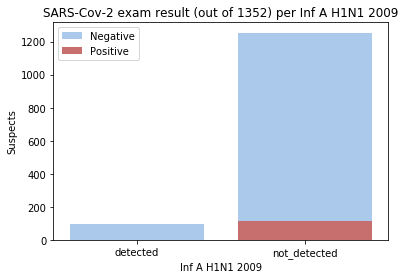

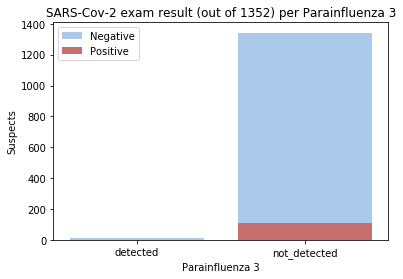

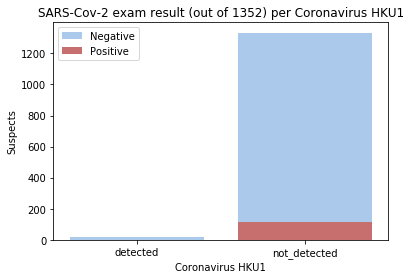

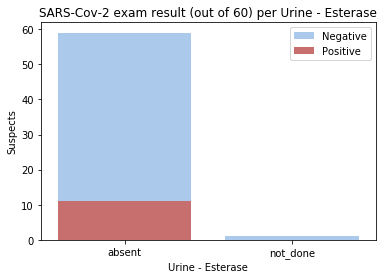

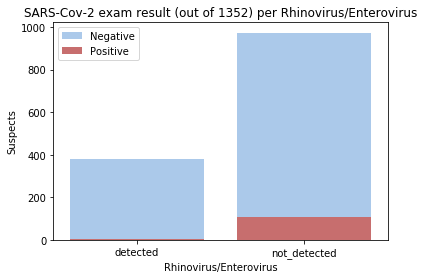

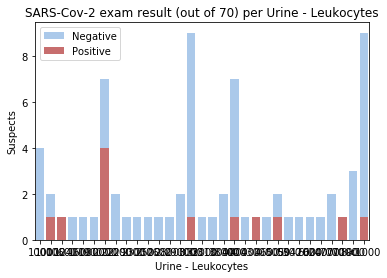

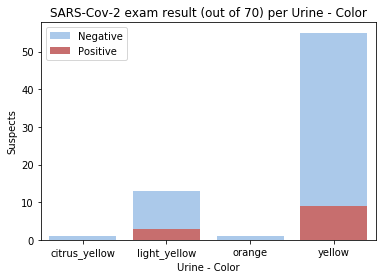

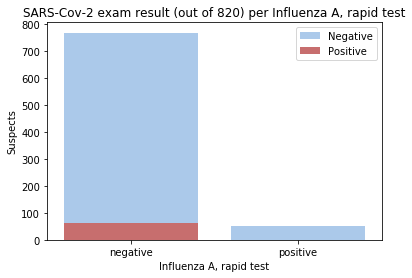

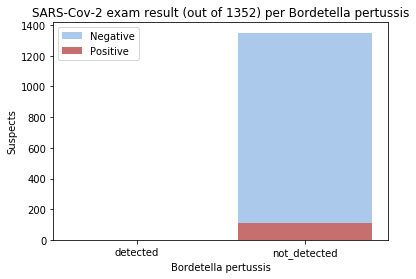

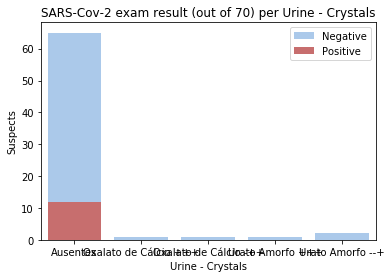

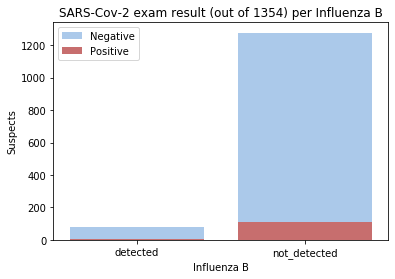

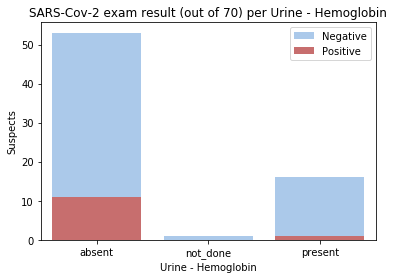

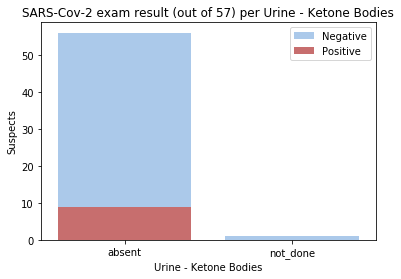

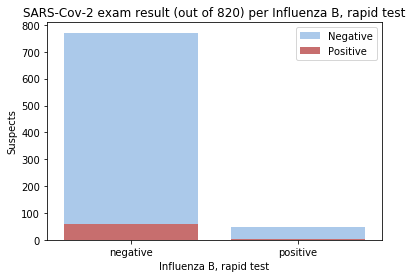

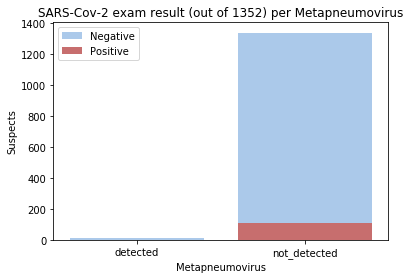

In [9]:
def plot_categorical(data, feature, label, save=False):
    plt.figure()

    dat = data.groupby(feature).count().reset_index()

    # Plot the total crashes
    sns.set_color_codes('pastel')
    sns.barplot(x=feature, y=label, label='Negative', data=dat, color='b')

    # Plot the total crashes
    sns.set_color_codes('muted')
    dat = data.groupby(feature).sum().reset_index()
    sns.barplot(x=feature, y=label, label='Positive', data=dat, color='r')
    
    plt.legend()
    plt.ylabel('Suspects')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')

    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/", "_")}.png')
        
        
for feature in features_categorical:
    plot_categorical(data, feature, label)

Besides the "Patient age quantile", all the other categorical features are not useful to predict the result of the SARS-Cov-2 for the following reasons:
- some have too few samples, preventing any meaninful conclusions (ie: Unire - Aspect)
- some have no meaninful separation between positive and negative (high entropy)

Let's move to the numerical features.

C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Diogo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Di

C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Diogo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

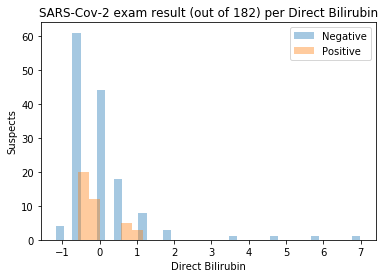

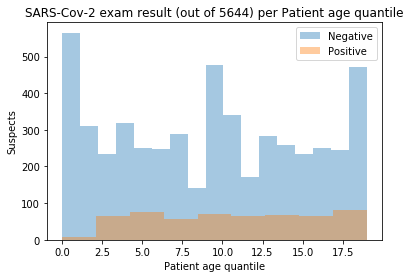

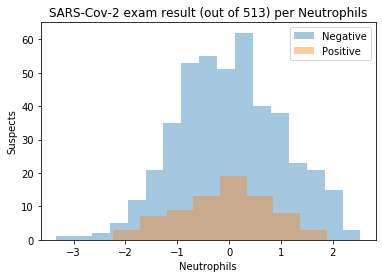

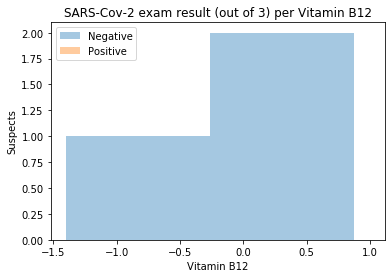

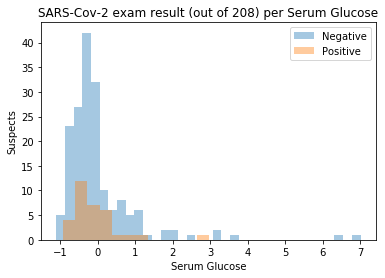

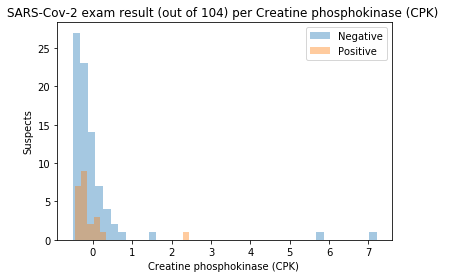

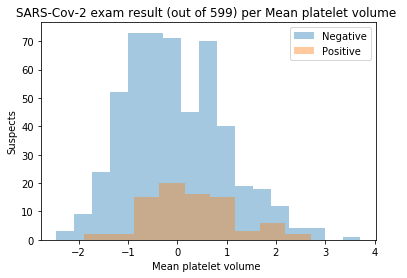

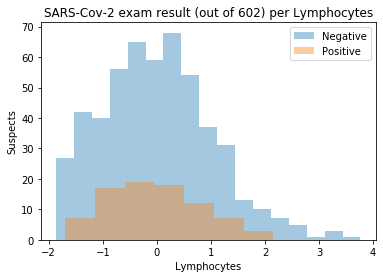

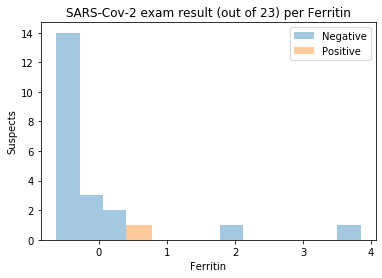

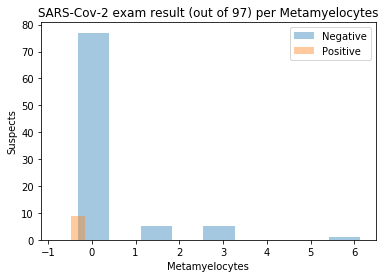

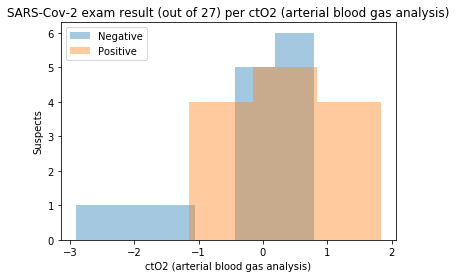

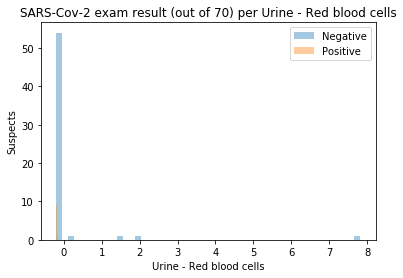

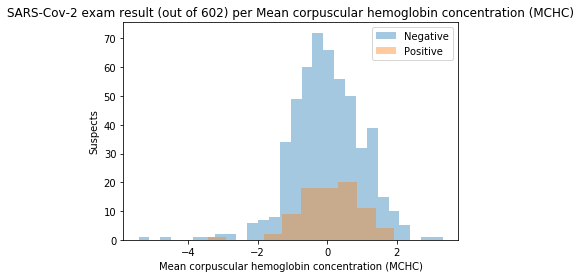

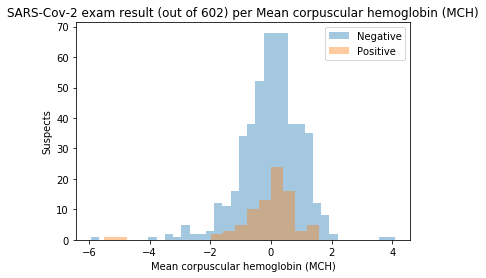

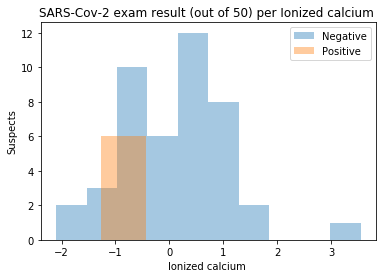

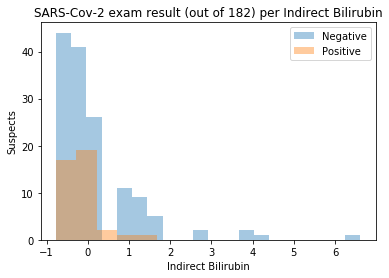

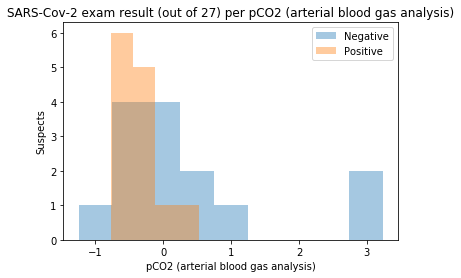

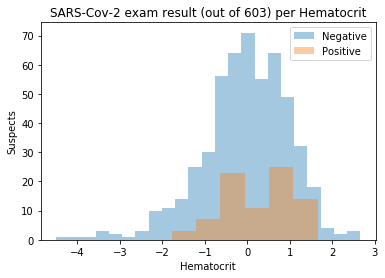

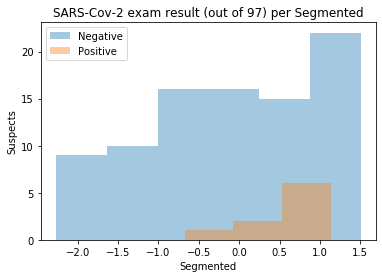

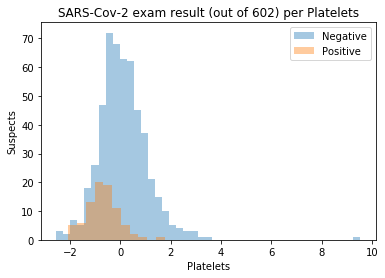

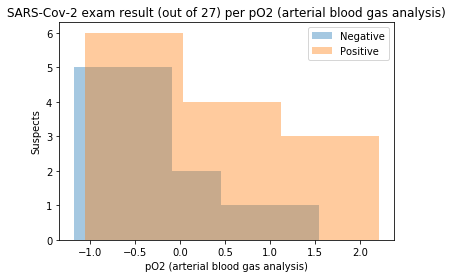

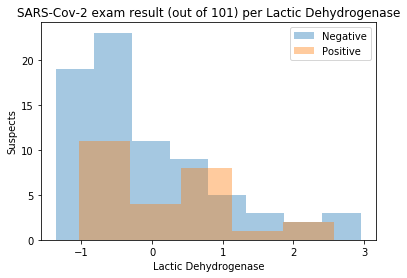

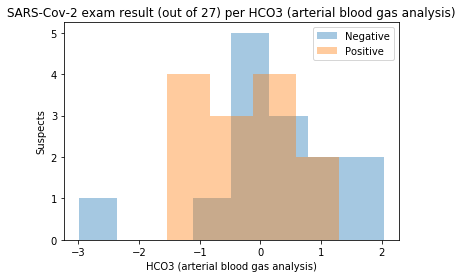

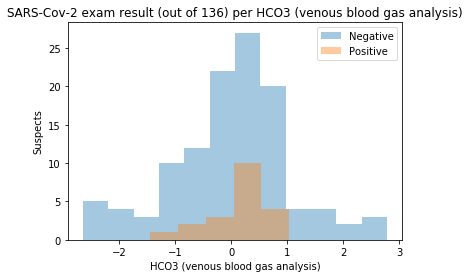

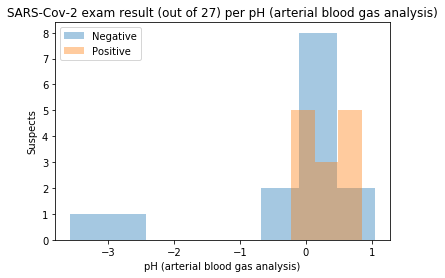

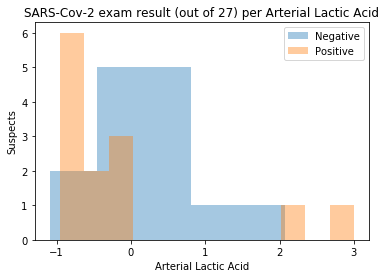

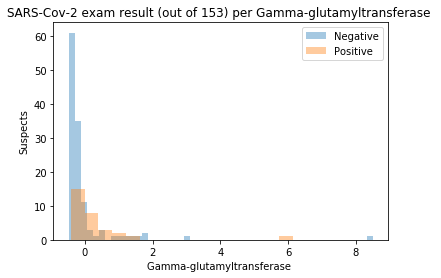

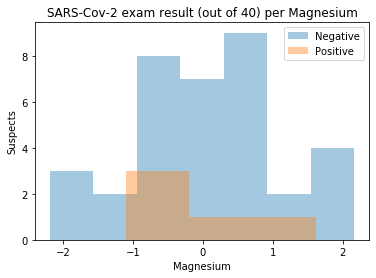

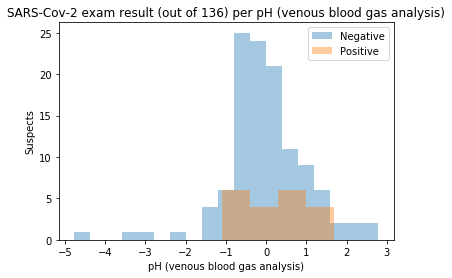

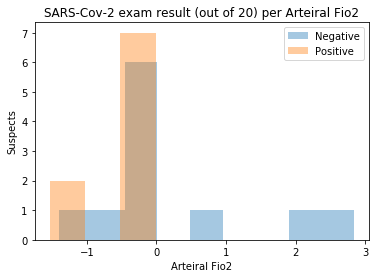

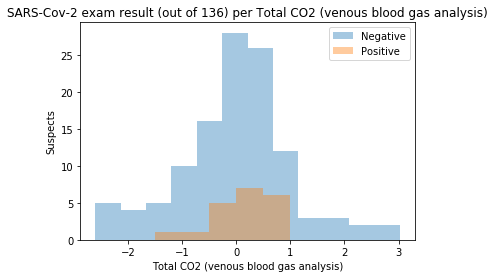

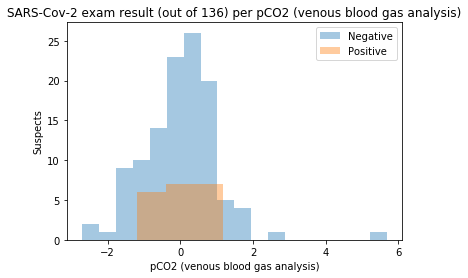

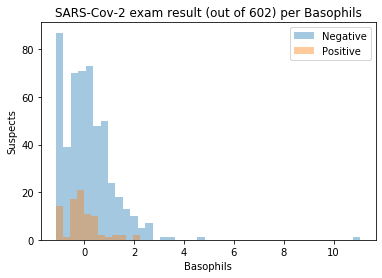

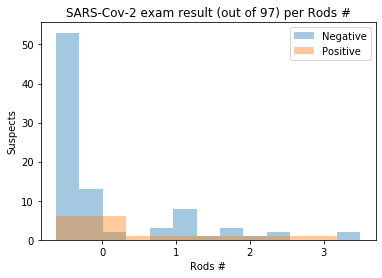

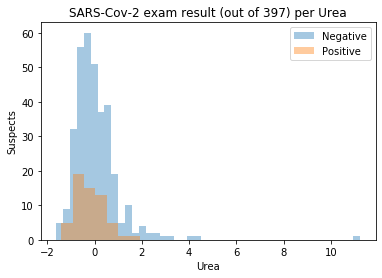

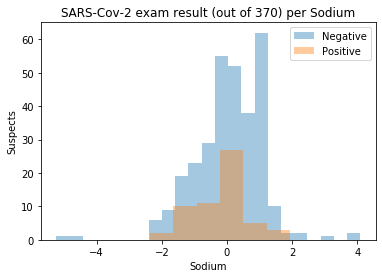

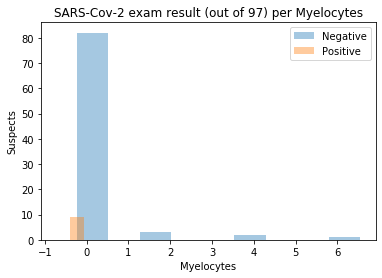

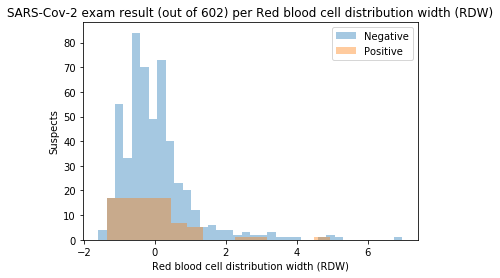

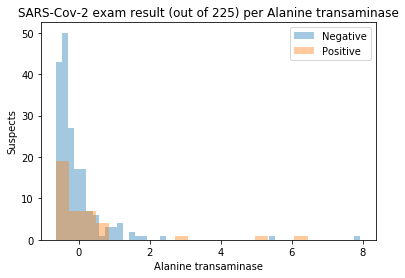

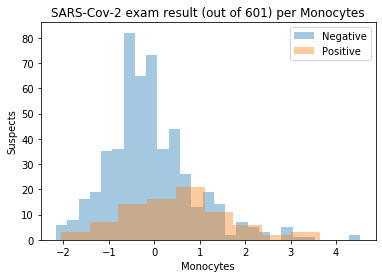

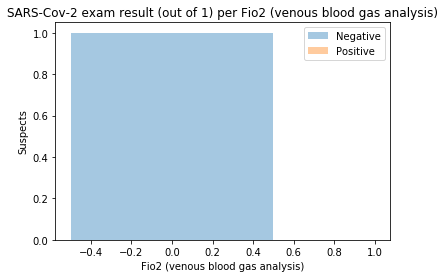

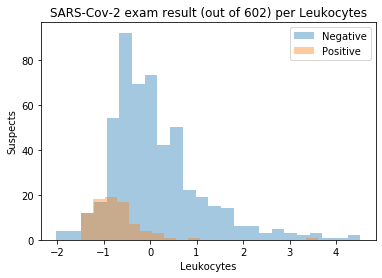

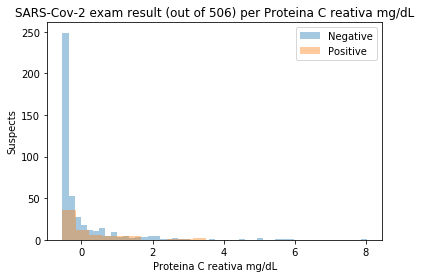

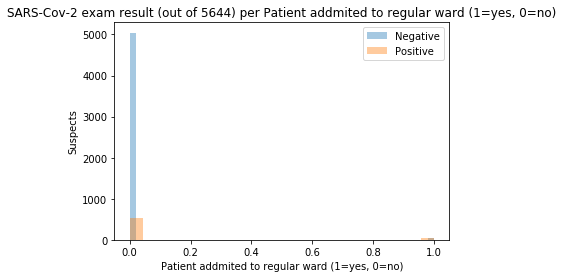

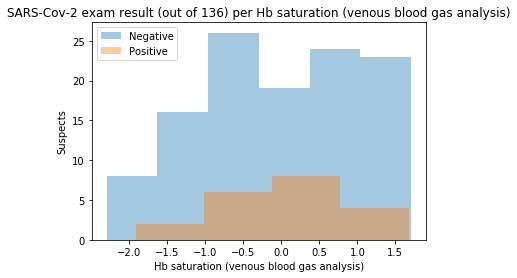

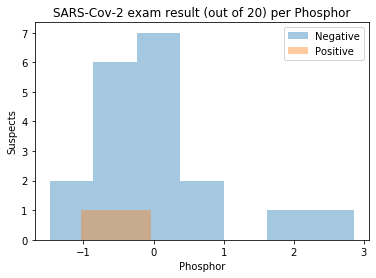

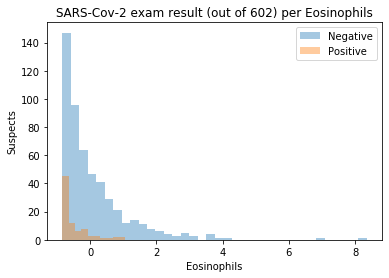

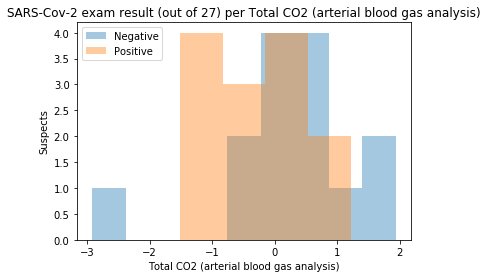

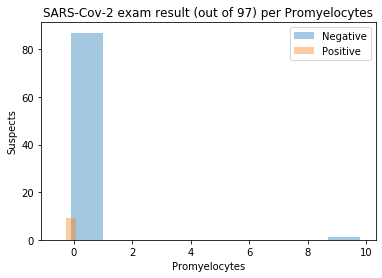

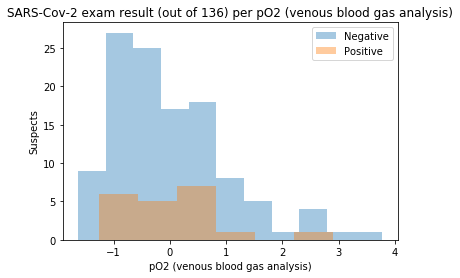

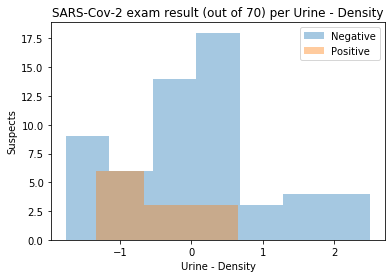

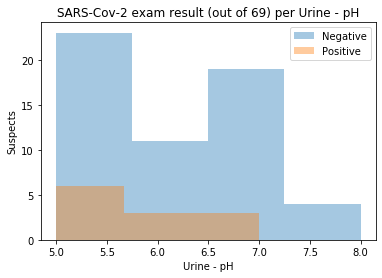

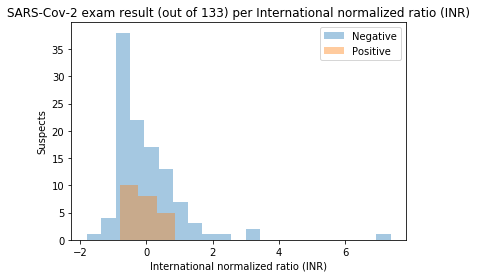

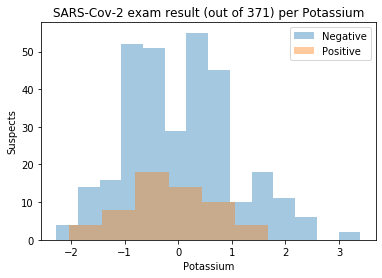

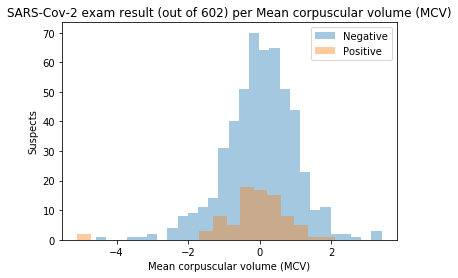

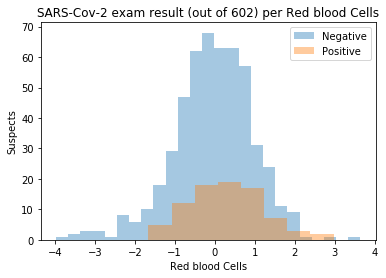

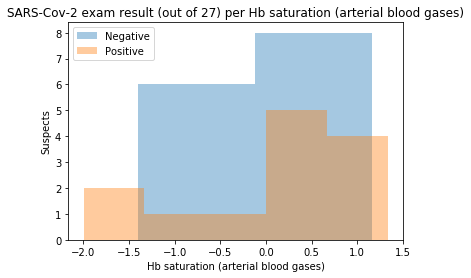

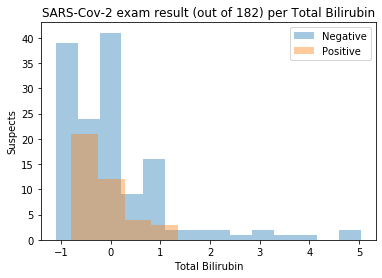

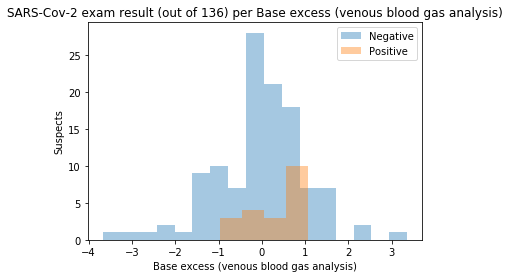

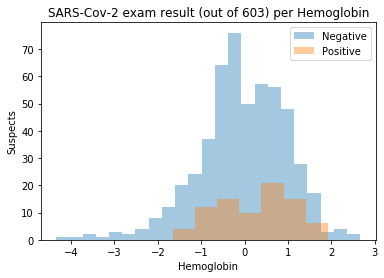

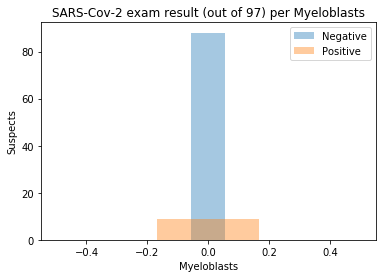

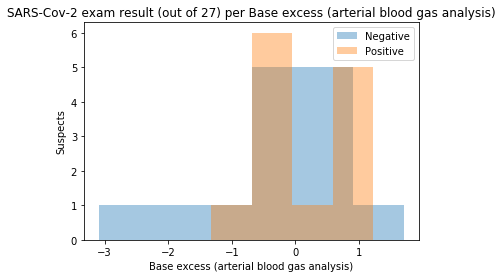

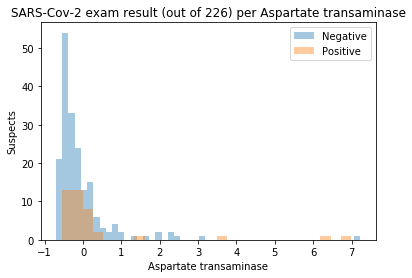

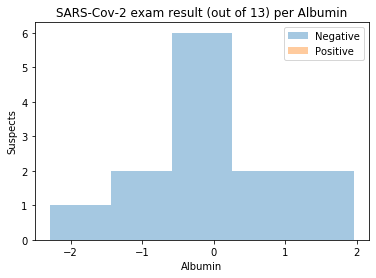

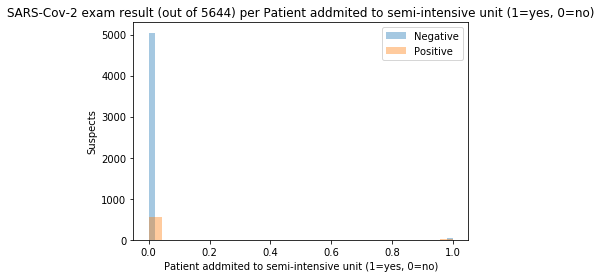

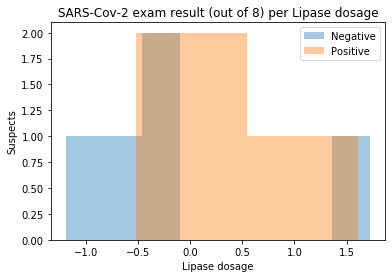

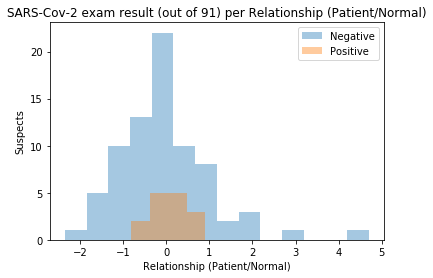

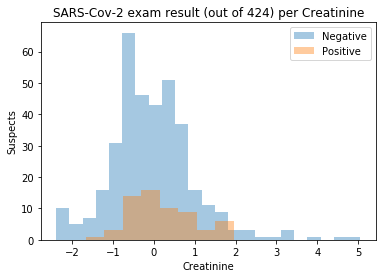

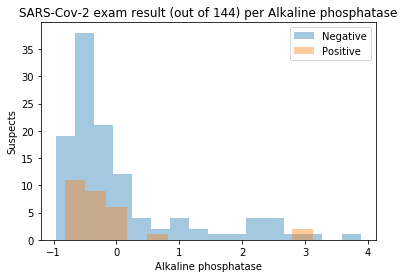

In [10]:
def plot_numerical(data, feature, label, save=False):
    plt.figure()
    hues = list(set(data[label]))
    for hue in hues:
        sns.distplot(data[feature][data[label]==hue].values, norm_hist=False, kde=False)

        
    hues = ['Negative' if hue==0 else 'Positive' if hue==1 else hue for hue in hues]
    plt.legend(hues)
    plt.xlabel(feature)
    plt.ylabel('Suspects')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')
    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/","_")}.png')
    

for feature in features_numerical:
    plot_numerical(data, feature, label)

In [236]:
# features_plot = [
#     'Patient age quantile',
#     'Hematocrit',
#     'Hemoglobin',
#     'Platelets',
#     'Mean platelet volume ',
#     'Red blood Cells',
#     'Lymphocytes',
#     'Leukocytes',
#     'Basophils',
#     'Mean corpuscular hemoglobin (MCH)',
#     'Eosinophils',
#     'Mean corpuscular volume (MCV)',
#     'Monocytes',
#     'Red blood cell distribution width (RDW)',
#     'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
# ]


# data_plot = data[features_plot + [label,]].dropna()
# # data_plot = data_plot[~data_plot.isna()]
# print(data_plot.shape)
# data_plot.head()


# d = data_plot

# plt.figure()
    
# for feature_1 in features_plot:
#     for feature_2 in features_plot:
#         if feature_1 != feature_2:

#             sns.scatterplot(x=feature_1, y=feature_2, size=features_covid[-1], data=d[d[label]=='negative'], 
#                               linewidth=0, s=16, alpha = 0.1, label='0')
#             sns.scatterplot(x=feature_1, y=feature_2, size=features_covid[-1], data=d[d[label]=='positive'],
#                               linewidth=0, s=16, alpha = 0.5, label='1', marker='.')   
#             plt.gca().get_legend().remove()
#             plt.savefig(f'./plots/Adapt_{feature_1} x {feature_2}.png')
#             plt.clf()

Most of the numerical features have the same problem explained above for the categorical features.

However, the features selected below do indeed show some difference in the distribution between positive and negative.

Let's use these chosen features to create some cluster plots and double-check if they are useful.

In [454]:
features_covid = [
    'Leukocytes',
    'Lymphocytes',
    'Monocytes',
    'Basophils',
    'Platelets',
    'Hematocrit',
    'Patient age quantile',
]

dat = data[features_covid + [label,]].dropna()

dat.loc[:, label] = [1 if y=='positive' else 0 for y in dat[label]]

print(dat.shape)
dat.head()

(601, 8)


,Leukocytes,Lymphocytes,Monocytes,Basophils,Platelets,Hematocrit,Patient age quantile,SARS-Cov-2 exam result
1,-0.094610,0.318366,0.357547,-0.223767,-0.517413,0.236515,17,0
8,0.364550,-0.005738,0.068652,-0.223767,1.429667,-1.571682,1,0
15,-0.884923,-1.114514,1.276759,0.081693,-0.429480,-0.747693,9,0
18,-0.211488,0.045436,-0.220244,-0.834685,0.072992,0.991838,11,0
22,-1.132592,0.002791,2.012129,0.387152,-0.668155,0.190738,9,0


In [461]:
n_negatives = dat[dat[label]==0].shape[0]
n_positives = dat[dat[label]==1].shape[0]

print(f'{n_negatives} {label} negatives.')
print(f'{n_positives} {label} positives.')

518 SARS-Cov-2 exam result negatives.
83 SARS-Cov-2 exam result positives.


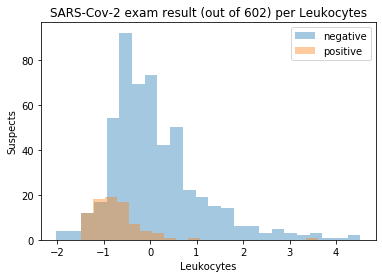

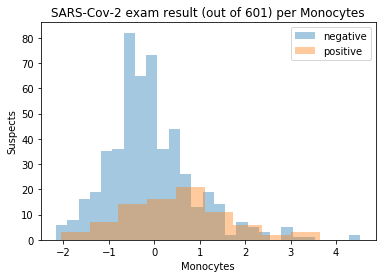

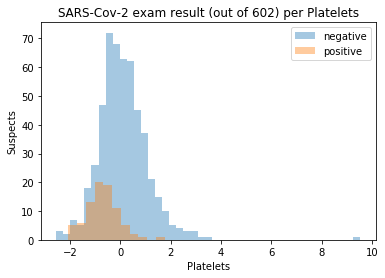

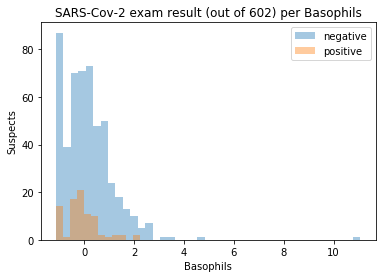

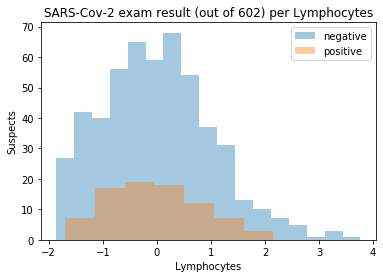

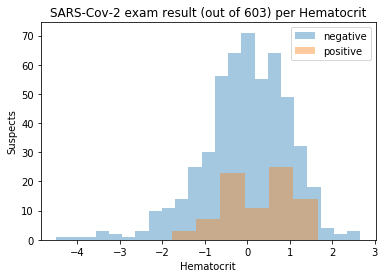

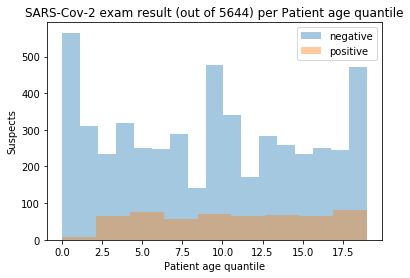

In [209]:
for feature in features_covid:
    plot_numerical(data, feature, label)
    plt.savefig(f'./plots/{feature}')

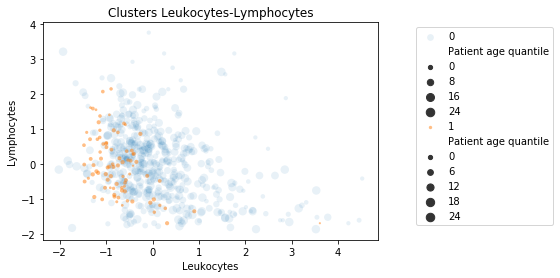

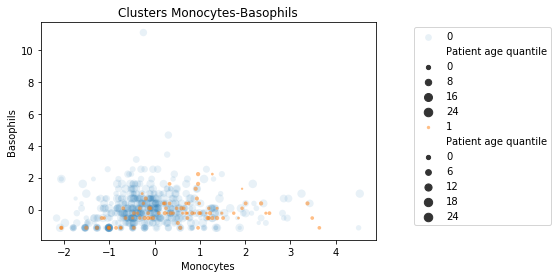

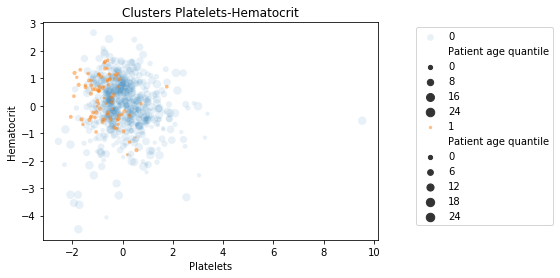

<Figure size 432x288 with 0 Axes>

In [246]:
for col in range(0, len(features_covid), 2):
    try:
        plt.figure()
        sns.scatterplot(x=features_covid[col], y=features_covid[col+1], size=features_covid[-1], data=dat[dat[label]==0], 
                          linewidth=0, s=16, alpha = 0.1, label='0')
        sns.scatterplot(x=features_covid[col], y=features_covid[col+1], size=features_covid[-1], data=dat[dat[label]==1], 
                          linewidth=0, s=16, alpha = 0.5, label='1', marker='.')
        plt.legend([0, 1])

    #     sns.scatterplot(x=features_covid[0], y=features_covid[col], size=features_covid[-1], hue=label, data=dat, 
    #                       linewidth=0, s=16, alpha = 0.6, marker='.')

        plt.title(f'Clusters {features_covid[col]}-{features_covid[col+1]}')
        plt.legend(bbox_to_anchor=(1.1, 1))
    except:
        pass

The plots above do show some distintict regions for positive and negative clusters.

However, there is a considerable overlap of negatives over some positives. For this reason, we shall not expect to have a flawless classifier trained over these data.

For this reason, our strategy for now on is find a test to reliably tell if a patient is negative (ie: 0 or blue) with low False Negative.

In other words, our new classifier will predict as either:
    - 0 = Negative
    - 1 = Inconclusive
    


In [14]:
# create a simple based on leukocytes threshold only

threshold_leukocytes = .5

samples = dat.shape[0]

indices_negatives = dat['Leukocytes'] > threshold_leukocytes
negatives = sum(indices_negatives)

false_negatives = sum(dat[indices_negatives][label]==1)# / len(indices_negatives)

print('Simple classifier based on leukocytes only:')
print(f'{negatives} ({round((negatives / samples)*100,1)}%) negative predictions')
print(f'{false_negatives} ({round((false_negatives / negatives)*100,1)}%) wrong negative predictions')

Simple classifier based on leukocytes only:
139 (23.1%) negative predictions
2 (1.4%) wrong negative predictions


This simple Decision Tree model above that sets a threshold of leukocytes > 0.5 to predict a 'Negative' (0) would lead to only two misclassifications, while most of the cases would result in 'Inconclusive' (1). While this model is somehow useful, there may be other models that can have more sophisticated criteria to predict 'Negative' for more samples without hurting the 'wrong negative predictions'.

# Define Score

We want a model that makes little mistake when it predicts 0 ('Negative'). Therefore, the metrics to be used is the 'Negative Predictive Value' as defined below. 

In [162]:
from sklearn.metrics import confusion_matrix


def false_negative_rate(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    true_negative, false_positive, false_negative, true_positive = CM.ravel()
    false_negative_rate = false_negative / (false_negative + true_positive)
    return false_negative_rate


def false_positive_rate(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    true_negative, false_positive, false_negative, true_positive = CM.ravel()
    false_positive_rate = false_positive / (false_positive + true_negative)
    return false_positive_rate


def negative_predictive_value(y_true, y_pred):
    # from those classified as Negative (0), how many are correctly classified?
    CM = confusion_matrix(y_true, y_pred)
    true_negative, false_positive, false_negative, true_positive = CM.ravel()
    return true_negative / (true_negative + false_negative)


def false_omission_rate(y_true, y_pred):
    return 1 - negative_predictive_value(y_true, y_pred)


def false_discovery_rate(y_true, y_pred):
    # from those classified as Negative (0), how many are correctly classified?
    CM = confusion_matrix(y_true, y_pred)
    true_negative, false_positive, false_negative, true_positive = CM.ravel()
    return false_positive / (true_positive + false_positive)


# negative_predictive_value(y_test, y_pred)

In [18]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class SimpleClassifier(DecisionTreeClassifier):
    
    def __init__(self, leukocytes_limits, monocytes_limits, platelets_limits, age_max):
        self.leuk_lim = leukocytes_limits
        self.mono_lim = monocytes_limits
        self.plat_lim = platelets_limits
        self.age_max = age_max
        
  
    def predict(self, X):
        n_samples = X.shape[0]
        y = np.array([1] * n_samples)
        i_negatives = (X[:,0] < self.leuk_lim[0]) + \
                      (X[:,0] > self.leuk_lim[1]) + \
                      (X[:,1] < self.mono_lim[0]) + \
                      (X[:,1] > self.mono_lim[1]) + \
                      (X[:,2] < self.plat_lim[0]) + \
                      (X[:,2] > self.plat_lim[1]) + \
                      (X[:,3] < self.age_max)
        
        for i, is_negative in enumerate(i_negatives):
            if is_negative:
                y[i] = 0
                
        return y
    
    
m = SimpleClassifier([-1.5, .32], [-2.1, 4], [-2.1, 1.8], 2)

y_pred = m.predict(dat[features_covid].values)

y_test = dat[label]

CM = confusion_matrix(y_test, y_pred)

samples = len(y_pred)
negatives = CM[:,0].sum()

print(f'{negatives} ({round(negatives/samples*100,1)}%) negative predictions')
print(f'{CM[1,0]} ({round(false_omission_rate(y_test, y_pred)*100,1)}%) wrong negative predictions')
print(f'{CM[0,1]} ({round(false_discovery_rate(y_test, y_pred)*100,1)}%) missed positive predictions')

194 (32.3%) negative predictions
2 (1.0%) wrong negative predictions
326 (80.1%) missed positive predictions


The SimpleClassifier above is overtrained, since it was created after visual inspection of the whole dataset.

In [19]:
# import pickle

# dict_save = {
#     'simple.pkl': m,
# }

# for file, variable in dict_save.items():
#     with open('./saved/' + file, 'wb') as file:
#         pickle.dump(variable, file)

# Create Model

It seems from the cluster plots above that there is no limitation neither special recomendation for any particular type of classifier. Therefore, let's create many types of classifiers and check which one have the best performance.

All the neural network types are not considered because the dataset is rather too small for a proper training.

Scale features between 0 and 1 to ensure data normalization, improving the classifier performance.

In [347]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = dat[features_covid].values
y = dat[label].values

X = scaler.fit_transform(X)

print(X.min(), X.max())
print(X)

0.0 1.0000000000000002
[[0.29434284 0.3878788  0.37647056 ... 0.16839917 0.66134191 0.89473684]
 [0.36452575 0.33030302 0.33333333 ... 0.32952185 0.40894569 0.05263158]
 [0.1735432  0.13333333 0.51372545 ... 0.17567568 0.52396174 0.47368421]
 ...
 [0.2245853  0.33181818 0.45882351 ... 0.17047818 0.72843451 0.78947368]
 [0.04381117 0.0060606  0.52941174 ... 0.06444907 0.17571886 0.89473684]
 [0.11186731 0.27878787 0.40784312 ... 0.13617464 0.72523967 1.        ]]


Split the data into train and test.

In [348]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

test_ratio = .2

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_ratio, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(480, 7)
(121, 7)


# Balance Train dataset

In [555]:
def balance_dataset(X, y, shuffle=True):
    
    count = Counter(y)
    
    all_labels = list(count.keys())
    
    n_labels = len(all_labels)
    
    min_occurencies = min(list(count.values()))
    
    rows_balanced = min_occurencies * n_labels
    
    X_balanced = np.zeros((rows_balanced, X.shape[1]))
    y_balanced = np.zeros((rows_balanced,))
    
    X_left = np.empty((0,X.shape[1]))
    y_left = np.empty(0)
    
    for i, label in enumerate(all_labels):
        indices = y==label
        
        X_trimmed = X[indices]
        y_trimmed = y[indices]
        
        i0 = i * min_occurencies
        i1 = i0 + min_occurencies
        
        # separate the minimum amount of occurencies
        X_balanced[i0:i1,:] = X_trimmed[:min_occurencies,:]
        y_balanced[i0:i1]   = y_trimmed[:min_occurencies]
        
        # store the left-overs
        X_left = np.concatenate([X_left, X_trimmed[min_occurencies:,:]])
        y_left = np.concatenate([y_left, y_trimmed[min_occurencies:]])
        
        
    return X_balanced, y_balanced, X_left, y_left


X_balanced, y_balanced, X_left, y_left = balance_dataset(X, y)

print(f'{len(y_balanced)} balanced train samples')
print(f'{len(y_left)} imbalanced test samples')

166 balanced train samples
435 imbalanced test samples


In [146]:
def get_name(model):
    return str(model.__class__).split('.')[-1][:-2]

In [536]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, RidgeClassifierCV, Perceptron, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import mixture

models = [
#     SGDClassifier(),
#     RidgeClassifier(),
#     RidgeClassifierCV(),
#     Perceptron(),
#     PassiveAggressiveClassifier(),
    SVC(kernel='rbf'),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="sigmoid"),
    SVC(gamma=2, C=1),
    KNeighborsClassifier(2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    RandomForestClassifier(max_depth=7, n_estimators=100),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
#     mixture.GaussianMixture(n_components=2),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
]



test_ratio = .2


best_score = -np.Inf

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#         test_size=test_ratio, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced,
        test_size=test_ratio, shuffle=True)

X_test = np.concatenate([X_test, X_left])
y_test = np.concatenate([y_test, y_left])

print('#\tSCORE\t\tCLASSIFIER')
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     score = mean_absolute_error(y_test, y_pred)
#     score = accuracy_score(y_test, y_pred)
#     score = fbeta_score(y_test, y_pred, average='weighted', beta=1)
#     score = recall_score(y_test, y_pred)
#     score = precision_score(y_test, y_pred)
#     score = roc_auc_score(y_test, y_pred)
    score = negative_predictive_value(y_test, y_pred)
    if score > best_score:# and best_score != np.inf:
        best_model = model
        best_score = score
        
    print(f'{i}\t{round(score*100,3)}%\t\t{get_name(model)}')

#	SCORE		CLASSIFIER
0	98.3%		SVC
1	98.251%		SVC
2	97.855%		SVC
3	95.87%		SVC
4	98.31%		SVC
5	97.487%		KNeighborsClassifier
6	97.527%		GaussianProcessClassifier
7	97.832%		DecisionTreeClassifier
8	97.312%		RandomForestClassifier
9	97.867%		RandomForestClassifier
10	98.118%		ExtraTreesClassifier
11	97.486%		GradientBoostingClassifier
12	96.755%		AdaBoostClassifier
13	98.082%		GaussianNB
14	99.102%		QuadraticDiscriminantAnalysis
15	97.849%		MLPClassifier


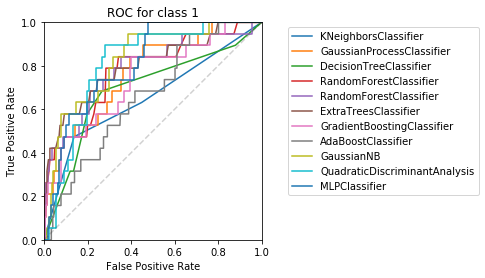

In [537]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

pos_label = 1

y_true = y_test

plt.figure()

leg = []

for model in models[1:]:

    y_true_class_roc = [1 if y==pos_label else 0 for y in y_true]

    try:
        fpr, tpr, _ = roc_curve(y_true_class_roc, model.predict_proba(X_test)[:, pos_label])

        plt.plot(fpr, tpr)
        
        leg.append(get_name(model))
        
    except:
        pass
    
    
plt.plot([0, 1], [0, 1], color='k', alpha=.2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC for class {pos_label}')
plt.legend(leg, bbox_to_anchor=(1.1, 1))#loc="lower right")
plt.show()

Ideally, our best classifier should have score=1. However, we know that this would not be possible since there is a considerable overlap between the clusters (0/negative, 1/positive/inconclusive) as explained before.

There is no classifier that outstands. Therefore, we choose the DecisionTreeClassifier to ease our capability of explaining how the model works.

Let's see the Confusion Metrics to check some additional metrics.

334 (71.2%) negative predictions
3 (0.9%) wrong negative predictions
119 (88.1%) wrong positive predictions


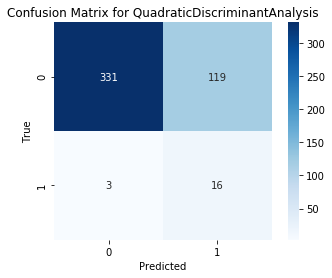

In [540]:
model = best_model
# model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
# model = models[8]

y_pred = model.predict(X_test)

CM = confusion_matrix(y_test, y_pred)


samples = len(y_pred)
negatives = CM[:,0].sum()

print(f'{negatives} ({round(negatives/samples*100,1)}%) negative predictions')
print(f'{CM[1,0]} ({round(false_omission_rate(y_test, y_pred)*100,1)}%) wrong negative predictions')
print(f'{CM[0,1]} ({round(false_discovery_rate(y_test, y_pred)*100,1)}%) wrong positive predictions')


plt.figure()
sns.heatmap(CM.astype(int), annot=True, fmt='d', cmap="Blues")
plt.title(f'Confusion Matrix for {get_name(model)}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.gca().set_aspect('equal')

On the one hand, the Confusion Matrix above shows low wrong negative predictions. This result is interesting for our goal. It is very likely to improve this figure with some tuning later.

On the other hand, the missed positive predictions are high. The model can not reliably predict Positive, as expected from the cluster plot above. Therefore, 1 will mean "Inconclusive" instead of "Positive".

# Tuning

Let's tune our model to lower the wrong negative predictions.

In [234]:
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


# def scorers():
#     scorers = {
#         'precision': make_scorer(precision_score),
#         'recall': make_scorer(recall_score),
#         'accuracy': make_scorer(accuracy_score),
#         'discovery': make_scorer(false_discovery_rate),
#         'negative': make_scorer(negative_predictive_value),
#         'omission': make_scorer(false_omission_rate),
#     }
#     return scorers


# def grid_search_wrapper(clf, param_grid, test_ratio=.2, refit_score='accuracy'):
#     """
#     fits a GridSearchCV classifier using refit_score for optimization
#     prints classifier performance metrics
#     """
#     skf = StratifiedKFold(n_splits=5)
    
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers(), refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
    

#     grid_search.fit(X_train, y_train)

#     # make the predictions
#     y_pred = grid_search.predict(X_test)

#     print('Best params for {}'.format(refit_score))
#     print(grid_search.best_params_)

#     # confusion matrix on the test data.
#     print('\nConfusion matrix of {} optimized for {} on the test data:'.format(get_name(clf), refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
#     return grid_search



# test_ratio = .5

# pos_label = 'positive'

# refit_score='negative'

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#     test_size=test_ratio, shuffle=True)


# param_grid = {'criterion': ['gini', 'entropy'],
#               'max_depth': range(14),
#              }
# model = DecisionTreeClassifier()
# tuned_model = grid_search_wrapper(model, param_grid, test_ratio, refit_score=refit_score)

# # param_grid = [{'kernel': ['rbf'], 'gamma': [1e3, 1e2, 1e1, 1, 1e-1], 'C': [1, 1e1, 1e2, 1e3]},
# #               {'kernel': ['linear'], 'C': [1e-9, 1e-8, 1e-7]}]
# # tuned_model = grid_search_wrapper(SVC(), param_grid, refit_score='negative')

# # param_grid = {
# # #     'learning_rate': ["constant", "invscaling", "adaptive"],
# #     'hidden_layer_sizes': [(64,256,64), (128,16), (64,128,16)],
# # #     'alpha': [10.0 ** -np.arange(1, 7)],
# #     'activation': ["logistic", "relu", "tanh", "identity"],
# #     }
# # tuned_model = grid_search_wrapper(MLPClassifier(max_iter=2000), param_grid, refit_score=refit_score)

Tune by changing the thresholds for 'negative' and 'positive'. Unclassified results return '7'.

In [583]:
def result(X_test, model, thresholds=[.9, .9], unknown_val=np.nan):    
    y_prob = model.predict_proba(X_test)
    results = [unknown_val] * X_test.shape[0]
    for label in range(y_prob.shape[1]):
        for row in range(y_prob.shape[0]):
            if y_prob[row, label] > thresholds[label]:
                results[row] = label

    return results



dict_labels = {
    0: 'Negative',
    1: 'Positive',
}


thresholds = [.75, 1]

y_pred = np.array(result(X_test, model, thresholds, unknown_val=1)).astype(int)

samples = len(y_pred)

print(f'Result for {get_name(model)} applied on {samples} test samples:')

for score_class in [0, 1]:
    indices = y_pred==score_class
    is_score_class_in_indices = sum(indices)>0
    if is_score_class_in_indices:
        score_rate = np.mean(y_test[indices] == y_pred[indices])
        n_class = sum(indices)
        print(f'{round(score_rate*100,1)}% right predictions as {dict_labels[score_class]} for {n_class} ({round(n_class/samples*100,1)}%) suspects')

Result for QuadraticDiscriminantAnalysis applied on 469 test samples:
99.6% right predictions as Negative for 249 (53.1%) suspects
8.2% right predictions as Positive for 220 (46.9%) suspects


In [584]:
y_pred_all = np.array(result(X, model, thresholds)).astype(int)
samples = len(y_pred_all)

print(f'Result for {get_name(model)} applied on {samples} train + test samples:')

for score_class in [0, 1]:
    indices = y_pred_all==score_class
    is_score_class_in_indices = sum(indices)>0
    if is_score_class_in_indices:
        score_rate = np.mean(y[indices] == y_pred_all[indices])
        n_class = sum(indices)
        print(f'{round(score_rate*100,1)}% right predictions as {dict_labels[score_class]} for {n_class} ({round(n_class/samples*100,1)}%) suspects')

Result for QuadraticDiscriminantAnalysis applied on 601 train + test samples:
99.0% right predictions as Negative for 288 (47.9%) suspects


The results above are interesting: around half of the suspects will be predicted as 'Negative' with around 1% of wrong negative predictions.

In [587]:
print(f'{round(specificity (y_test, y_pred)*100,1)}% specificity')
print(f'{round(recall_score(y_test, y_pred)*100,1)}% sensitivity')

55.1% specificity
94.7% sensitivity


In [575]:
# result(np.array([[-1, -1, -1, 0]]), model, thresholds)

In [609]:
import pickle

dict_save = {
    'scaler.pkl': scaler,
    'model.pkl' : model,
}

for file, variable in dict_save.items():
    with open('./saved/' + file, 'wb') as file:
        pickle.dump(variable, file)

# Test Cases

Let's cherry-pick one input vector for each class in order to be our testbench when deploying this model.

In [608]:
y_cases = []

for i in [1, 0]:
#     print(X_test[i,:])
    y_case = (scaler.inverse_transform([X_test[i,:]]) + np.array([2, 2, 2, 0, 0, 0, 0])) * [11e3/6, 1e3/6, 450e3/6, 1, 1, 1, 1]
    y_case = y_case[0].astype(int)
    y_cases.append(y_case)
    print('Label ', y_pred[i], '\t: ', y_case)

Label  1 	:  [  2615    257 340304      0      0      0     14]
Label  1 	:  [  3636    102 101965      0      0      0     11]


The cases above are useful as testbench cases when deploying the model.

In [210]:
features_covid

['Leukocytes',
 'Monocytes',
 'Platelets',
 'Basophils',
 'Lymphocytes',
 'Hematocrit',
 'Patient age quantile']

In [605]:
inconclusives = [
    [ 1, 0, 1, 0, 0, 0, 0],
    [-1, 0, 1, 0,-1, 0, 0],
    [ 2, 1, 2, 1, 1, 1, 0],
]
print(result(scaler.transform(inconclusives), model, thresholds))

negatives = [
    [ 4, 4, 4, 1, 1, 1, 0],
    [-2,-2,-2, 4, 3, -2, 0],
    [ 6, 6, 6, 4, 3, -2, 0],
]
print(result(scaler.transform(negatives), model, thresholds))

[nan, nan, nan]
[0, 0, 0]


# Conclusion

Our new classifier is promising.


It is valuable to tell which patients do not need to perform the SARS-CoV-2 RT-PCR test. Instead, the new suspects get through a simple hemogram which is cheaper and faster. The main benefits of this new procedure are:

    - Faster results using the present new classifier, increasing throughput of suspects admitted to the ICU; and
    - Half of the suspects from this sample were predicted as 'Negative', meaning that this new classifer would have spared half of the SARS-CoV-2 RT-PCR test kits if this test were applied as triage before using the kits.
   
   
However, it is not a flawless test since:
    - The other half of the suspects will have result as 'Inconclusive' and shall move forward with the SARS-CoV-2 RT-PCR test;
    - 1.3% of the above ('Negative' for the blood test) would in fact be 'Positive' for the SARS-CoV-2 RT-PCR test. It can be tuned, though; and
    - This dataset is restrict to a small parcel so there is no guarantee when applied to different population or time frame.


The value of this new classifier is the capability of handling the following scenarios:
- Shortage of SARS-CoV-2 RT-PCR test kits; and
- Crowded ICU that can not wait for the long delays associated to the SARS-CoV-2 RT-PCR results for all the suspects.